<a href="https://colab.research.google.com/github/Kunal-Aher/Data/blob/main/Top_university.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Step 1: Load the Data

df=pd.read_csv(r'/content/topuniversities.csv')
df

Rank  Ordinal Rank                           University Name  \
0       1             1                         Peking University   
1       2             2               The University of Hong Kong   
2       3             3    National University of Singapore (NUS)   
3       4             4          Nanyang Technological University   
4       5             5                          Fudan University   
..    ...           ...                                       ...   
295   296           296  National Chinyi University of Technology   
296   297           296               Sungshin Women's University   
297   298           298              Northwest University (China)   
298   299           299                 Ocean University of China   
299   300           300          Huazhong Agricultural University   

     Overall Score           City      Country  Citations per Paper  \
0            100.0        Beijing        China                 96.4   
1             99.7       Pokfulam    Hong Kong                 99.5   
2             98.9      Singapore    Singapore                 99.9   
3             98.3      Singapore    Singapore                100.0   
4             97.2       Shanghai        China                 92.1   
..             ...            ...          ...                  ...   
295           29.5  Taichung City       Taiwan                 25.8   
296           29.5          Seoul  South Korea                  9.1   
297           29.2          Xi'an        China                 64.5   
298           29.1        Qingdao        China                 48.1   
299           29.0          Wuhan        China                 91.5   

     Papers per Faculty  Academic Reputation  Faculty Student Ratio  \
0                  79.8                100.0                   98.6   
1                  55.0                100.0                   93.3   
2                  57.4                100.0                   85.8   
3                  53.8                100.0                   93.0   
4                  63.1                 99.8                   92.5   
..                  ...                  ...                    ...   
295                15.9                 31.9                   12.9   
296                 2.1                 21.4                   93.0   
297                27.4                 16.1                   69.5   
298                60.5                 20.8                   13.9   
299                52.2                 16.7                   12.1   

     Staff with PhD  International Research Center  International Students  \
0              90.7                           98.0                    69.1   
1              97.4                           98.4                   100.0   
2              82.5                           99.9                    99.2   
3              67.0                           99.7                    98.8   
4              73.4                           92.1                    81.0   
..              ...                            ...                     ...   
295            52.1                           11.5                    29.8   
296            18.6                            2.5                    22.5   
297            17.5                           49.7                    13.3   
298            33.0                           76.4                     6.5   
299            61.0                           45.6                     6.6   

     Outbound Exchange  Inbound Exchange  International Faculty  \
0                100.0              88.5                   83.2   
1                100.0              99.8                  100.0   
2                 97.6              93.4                  100.0   
3                 97.9              90.5                  100.0   
4                 94.9              99.5                   98.9   
..                 ...               ...                    ...   
295                3.4              17.2                    5.1 

In [26]:
# Step 2: Understand the Data

df.head()

Rank  Ordinal Rank                         University Name  Overall Score  \
0     1             1                       Peking University          100.0   
1     2             2             The University of Hong Kong           99.7   
2     3             3  National University of Singapore (NUS)           98.9   
3     4             4        Nanyang Technological University           98.3   
4     5             5                        Fudan University           97.2   

        City    Country  Citations per Paper  Papers per Faculty  \
0    Beijing      China                 96.4                79.8   
1   Pokfulam  Hong Kong                 99.5                55.0   
2  Singapore  Singapore                 99.9                57.4   
3  Singapore  Singapore                100.0                53.8   
4   Shanghai      China                 92.1                63.1   

   Academic Reputation  Faculty Student Ratio  Staff with PhD  \
0                100.0                   98.6            90.7   
1                100.0                   93.3            97.4   
2                100.0                   85.8            82.5   
3                100.0                   93.0            67.0   
4                 99.8                   92.5            73.4   

   International Research Center  International Students  Outbound Exchange  \
0                           98.0                    69.1              100.0   
1                           98.4                   100.0              100.0   
2                           99.9                    99.2               97.6   
3                           99.7                    98.8               97.9   
4                           92.1                    81.0               94.9   

   Inbound Exchange  International Faculty  Employer Reputation  
0              88.5                   83.2                100.0  
1              99.8                  100.0                 96.8  
2              93.4                  100.0                 99.9  
3              90.5                  100.0                 98.8  
4              99.5                   98.9                 99.5

In [27]:
df.columns

Index(['Rank', 'Ordinal Rank', 'University Name', 'Overall Score', 'City',
       'Country', 'Citations per Paper', 'Papers per Faculty',
       'Academic Reputation', 'Faculty Student Ratio', 'Staff with PhD',
       'International Research Center', 'International Students',
       'Outbound Exchange', 'Inbound Exchange', 'International Faculty',
       'Employer Reputation'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           300 non-null    int64  
 1   Ordinal Rank                   300 non-null    int64  
 2   University Name                300 non-null    object 
 3   Overall Score                  300 non-null    float64
 4   City                           300 non-null    object 
 5   Country                        300 non-null    object 
 6   Citations per Paper            300 non-null    float64
 7   Papers per Faculty             300 non-null    float64
 8   Academic Reputation            300 non-null    float64
 9   Faculty Student Ratio          300 non-null    float64
 10  Staff with PhD                 294 non-null    float64
 11  International Research Center  300 non-null    float64
 12  International Students         296 non-null    flo

In [29]:
df.describe()

Rank  Ordinal Rank  Overall Score  Citations per Paper  \
count  300.000000    300.000000     300.000000           300.000000   
mean   150.500000    150.133333      52.057667            44.869667   
std     86.746758     86.556739      19.123336            34.088756   
min      1.000000      1.000000      29.000000             1.000000   
25%     75.750000     75.750000      35.850000            11.075000   
50%    150.500000    150.500000      46.250000            39.050000   
75%    225.250000    225.250000      62.725000            76.150000   
max    300.000000    300.000000     100.000000           100.000000   

       Papers per Faculty  Academic Reputation  Faculty Student Ratio  \
count          300.000000           300.000000             300.000000   
mean            41.288667            51.648000              50.976333   
std             29.994062            26.305925              31.338651   
min              1.200000             8.800000               2.600000   
25%             14.500000            30.100000              21.750000   
50%             36.750000            45.150000              47.850000   
75%             61.775000            67.550000              80.300000   
max            100.000000           100.000000             100.000000   

       Staff with PhD  International Research Center  International Students  \
count      294.000000                     300.000000              296.000000   
mean        53.959524                      60.108333               35.779054   
std         35.002787                      31.179020               31.477270   
min          1.000000                       1.100000                1.300000   
25%         15.850000                      33.475000                9.175000   
50%         62.300000                      67.100000               23.950000   
75%         86.800000                      88.675000               58.100000   
max        100.000000                     100.000000              100.000000   

       Outbound Exchange  Inbound Exchange  International Faculty  \
count         300.000000        300.000000             283.000000   
mean           38.573667         35.303667              38.437456   
std            34.467015         36.086228              30.571068   
min             1.000000          1.000000               1.000000   
25%             8.300000          3.300000              12.800000   
50%            28.100000         20.100000              29.500000   
75%            62.925000         67.800000              56.850000   
max           100.000000        100.000000             100.000000   

       Employer Reputation  
count           300.000000  
mean             54.646000  
std              29.915534  
min               4.100000  
25%              28.150000  
50%              53.050000  
75%              81.850000  
max             100.000000

In [30]:
# Step 3: Handle Missing Values
nulls=df.isnull().sum()
nulls

Rank                              0
Ordinal Rank                      0
University Name                   0
Overall Score                     0
City                              0
Country                           0
Citations per Paper               0
Papers per Faculty                0
Academic Reputation               0
Faculty Student Ratio             0
Staff with PhD                    6
International Research Center     0
International Students            4
Outbound Exchange                 0
Inbound Exchange                  0
International Faculty            17
Employer Reputation               0
dtype: int64

In [31]:
percent_missing=nulls*100/len(df)
percent_missing

Rank                             0.000000
Ordinal Rank                     0.000000
University Name                  0.000000
Overall Score                    0.000000
City                             0.000000
Country                          0.000000
Citations per Paper              0.000000
Papers per Faculty               0.000000
Academic Reputation              0.000000
Faculty Student Ratio            0.000000
Staff with PhD                   2.000000
International Research Center    0.000000
International Students           1.333333
Outbound Exchange                0.000000
Inbound Exchange                 0.000000
International Faculty            5.666667
Employer Reputation              0.000000
dtype: float64

In [32]:
df['Staff with PhD'].isnull().value_counts()

Staff with PhD
False    294
True       6
Name: count, dtype: int64

In [33]:
import numpy as np

def relacenulls(col, col2, col3):
    col = col.fillna(np.mean(col))
    col2 = col2.fillna(np.mean(col2))
    col3 = col3.fillna(np.mean(col3))
    return col, col2, col3

# Assuming 'df' is your DataFrame
col = df['Staff with PhD']
col2 = df['International Students']
col3 = df['International Faculty']

# Call the function and update the DataFrame
df['Staff with PhD'], df['International Students'], df['International Faculty'] = relacenulls(col, col2, col3)

print(df[['Staff with PhD', 'International Students', 'International Faculty']])


     Staff with PhD  International Students  International Faculty
0              90.7                    69.1                   83.2
1              97.4                   100.0                  100.0
2              82.5                    99.2                  100.0
3              67.0                    98.8                  100.0
4              73.4                    81.0                   98.9
..              ...                     ...                    ...
295            52.1                    29.8                    5.1
296            18.6                    22.5                    7.7
297            17.5                    13.3                   10.6
298            33.0                     6.5                    8.5
299            61.0                     6.6                   11.7

[300 rows x 3 columns]


In [34]:
Staff=df['Staff with PhD'].isnull().value_counts()

International=df['International Students'].isnull().value_counts()

Faculty=df['International Faculty'].isnull().value_counts()

print(Staff)
print("____________________________________________________________")
print(International)
print("____________________________________________________________")
print(Faculty)

Staff with PhD
False    300
Name: count, dtype: int64
____________________________________________________________
International Students
False    300
Name: count, dtype: int64
____________________________________________________________
International Faculty
False    300
Name: count, dtype: int64


In [35]:
df.isnull().sum()

Rank                             0
Ordinal Rank                     0
University Name                  0
Overall Score                    0
City                             0
Country                          0
Citations per Paper              0
Papers per Faculty               0
Academic Reputation              0
Faculty Student Ratio            0
Staff with PhD                   0
International Research Center    0
International Students           0
Outbound Exchange                0
Inbound Exchange                 0
International Faculty            0
Employer Reputation              0
dtype: int64

In [36]:
# Step 4: Handle Duplicates
df.duplicated().sum()

0

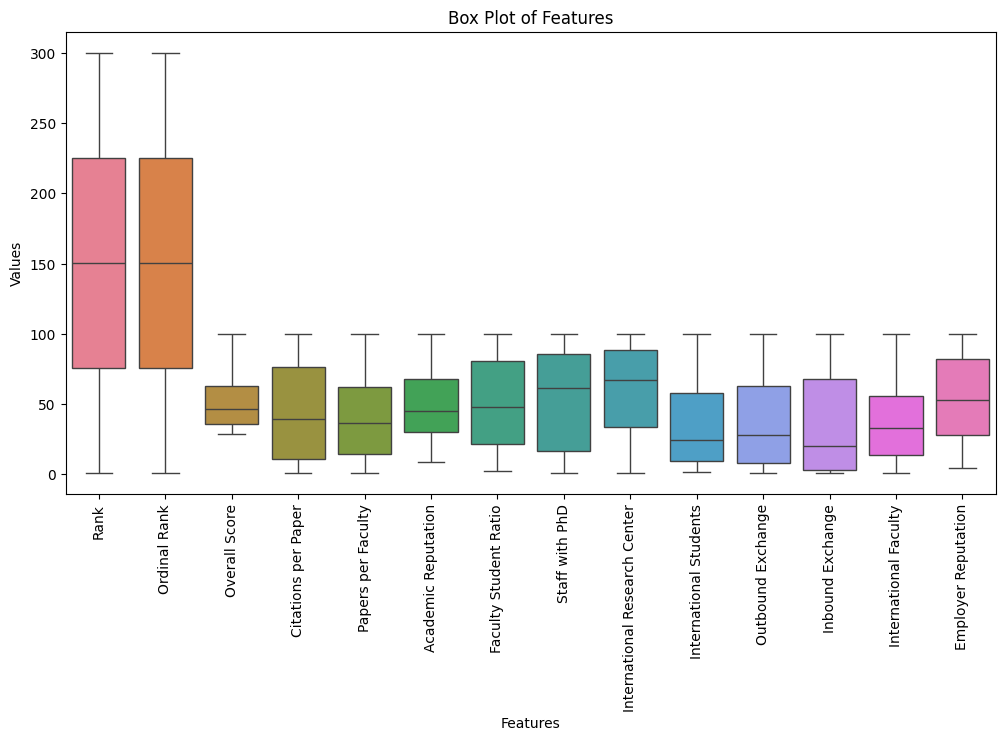

In [37]:
# Step 5: Handle Outliers
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box Plot of Features')
plt.show()

The main reason to convert country names (or any categorical data) into multi-binary values using one-hot encoding (dummies) is that machine learning models require numerical data and cannot directly process text or labels. Here's why it's necessary and beneficial:
1. Avoiding Unintended Ordinal Relationships
If you assign numbers directly (e.g., USA = 1, UK = 2, India = 3), the model may interpret these values as ordinal (implying that India > UK > USA).

Problem: Countries are nominal data, meaning their values don't have an inherent order.
Solution: One-hot encoding creates separate binary columns for each category, avoiding any false relationship

2. Ensuring Proper Weighting in Models
In algorithms like Linear Regression, Neural Networks, or SVMs, the numerical value associated with a country can disproportionately influence the model.

By creating binary columns, you ensure each country is treated as an independent, equally important feature.


<Figure size 1200x600 with 0 Axes>

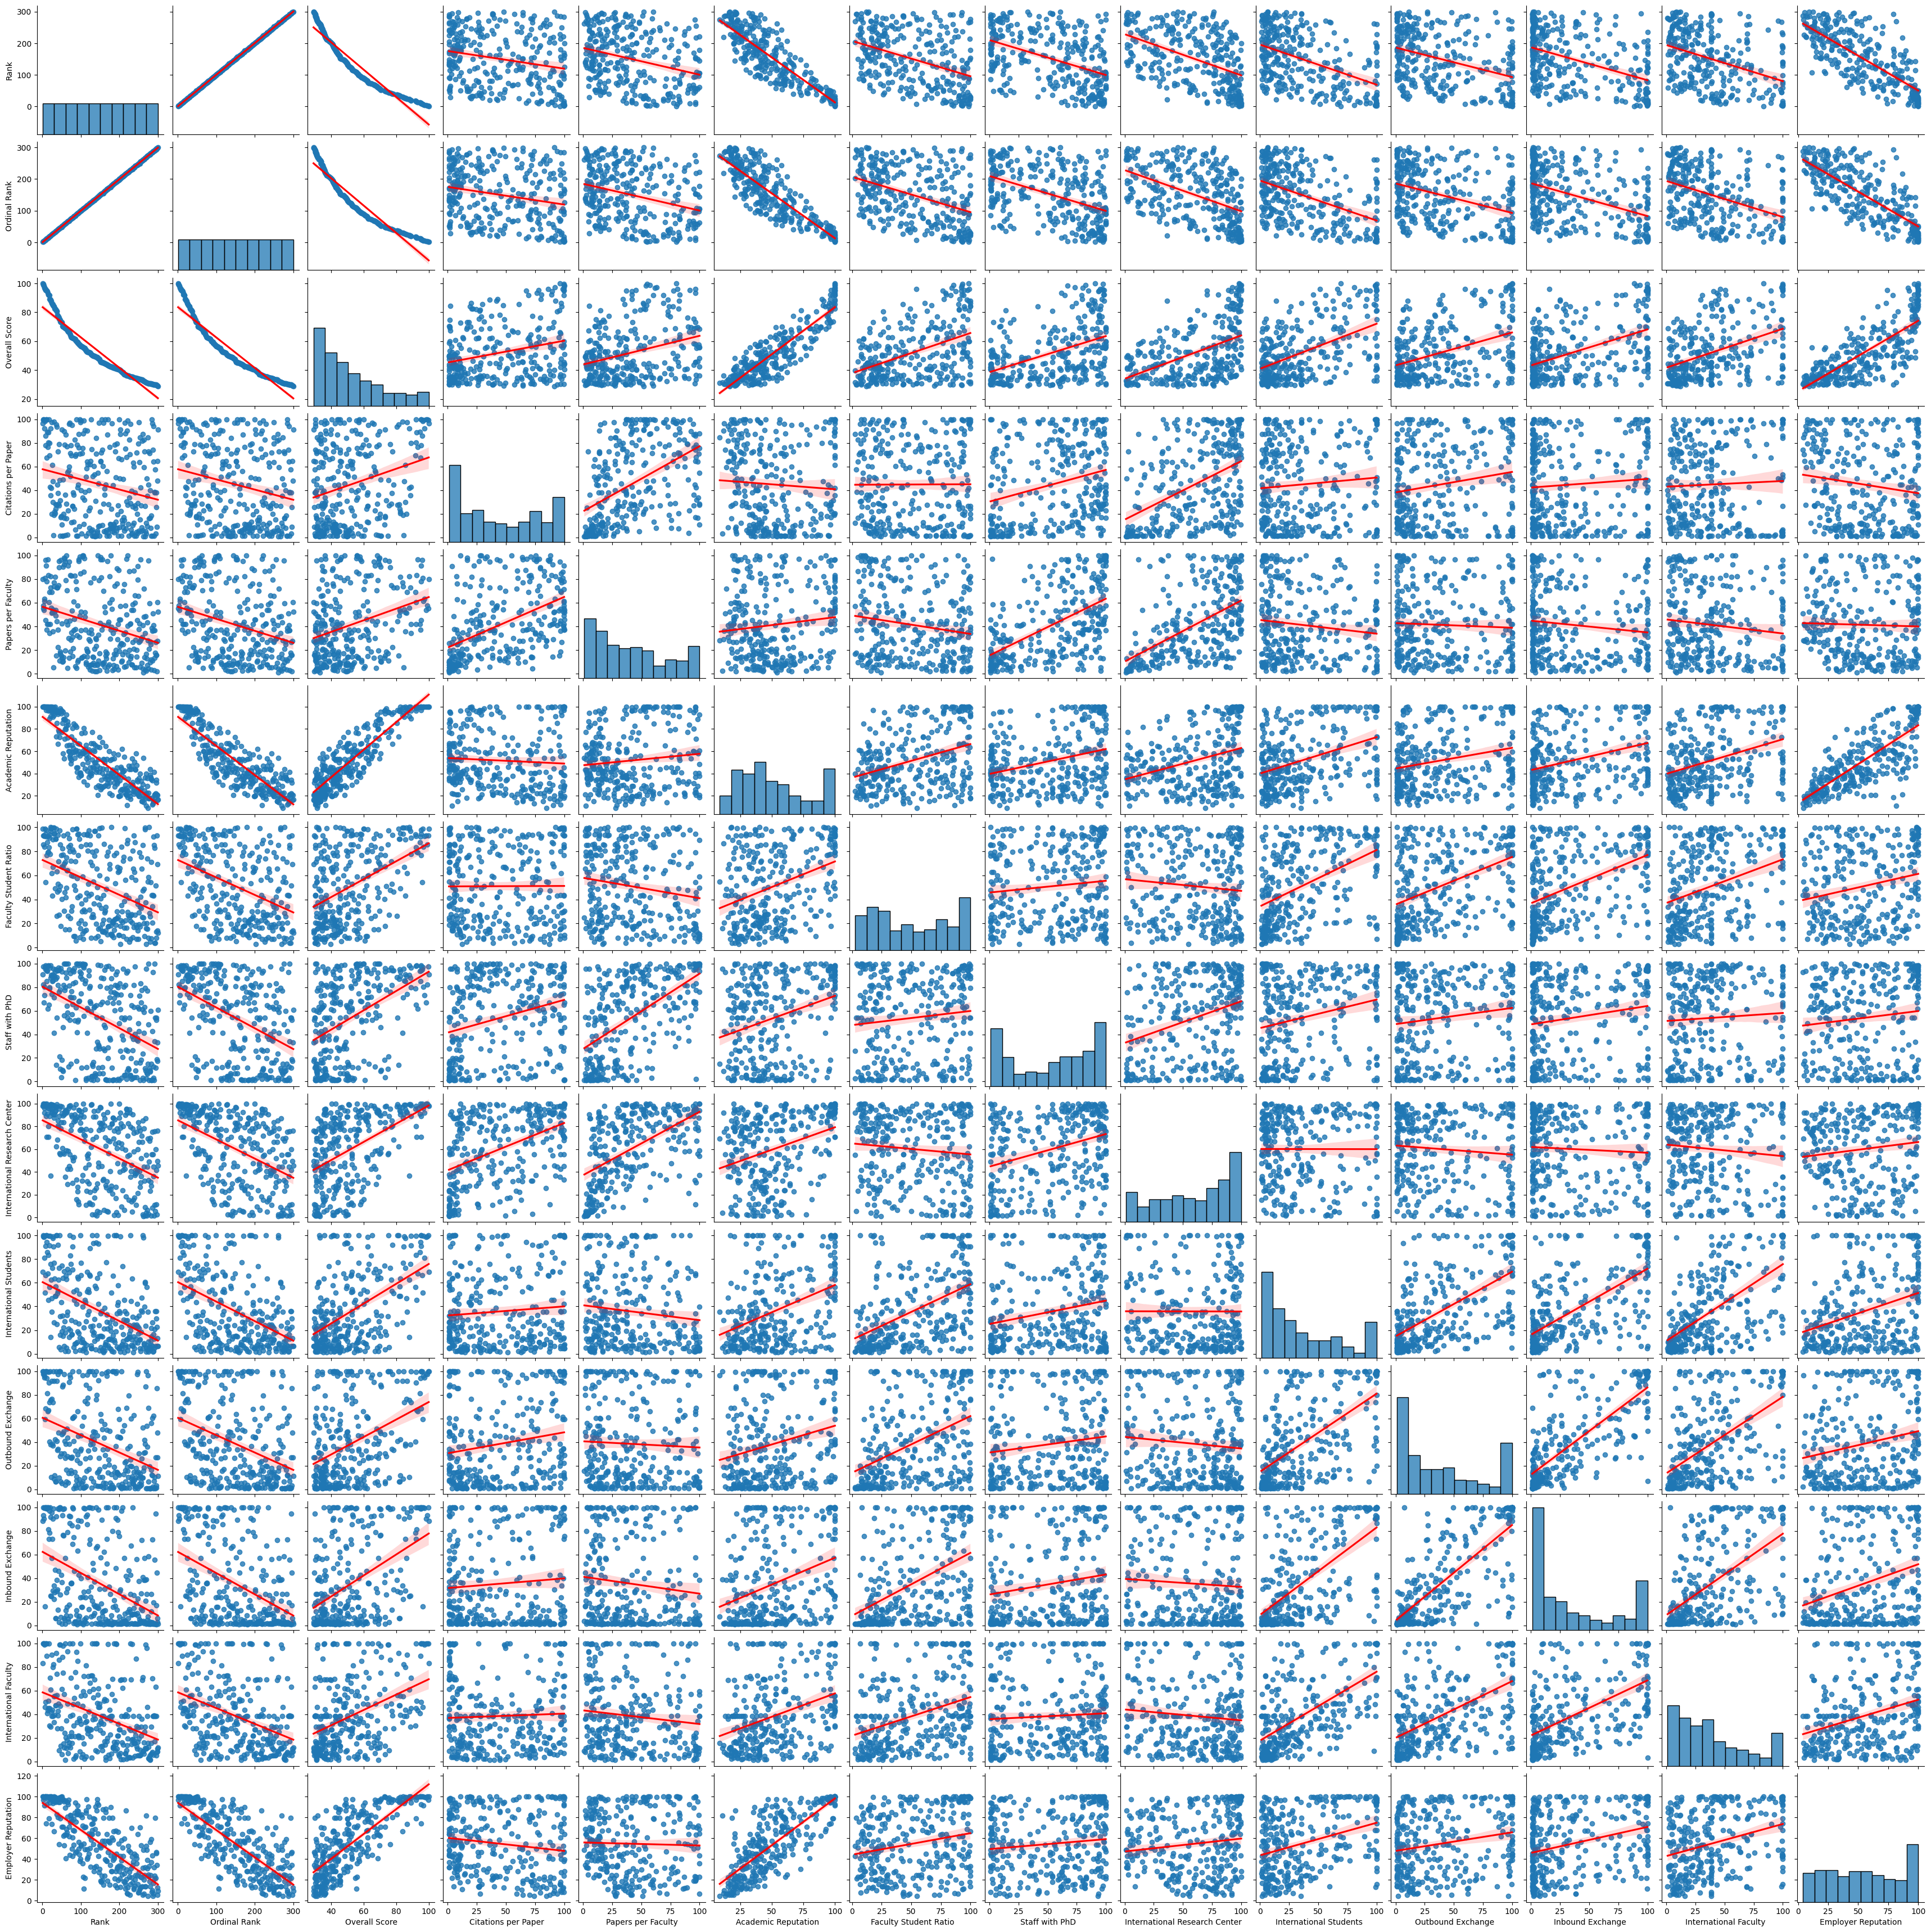

In [38]:
plt.figure(figsize=(12,6))
plot_kws = {'line_kws': {'color': 'red'}}
sns.pairplot(df,kind='reg',plot_kws=plot_kws)
plt.show()


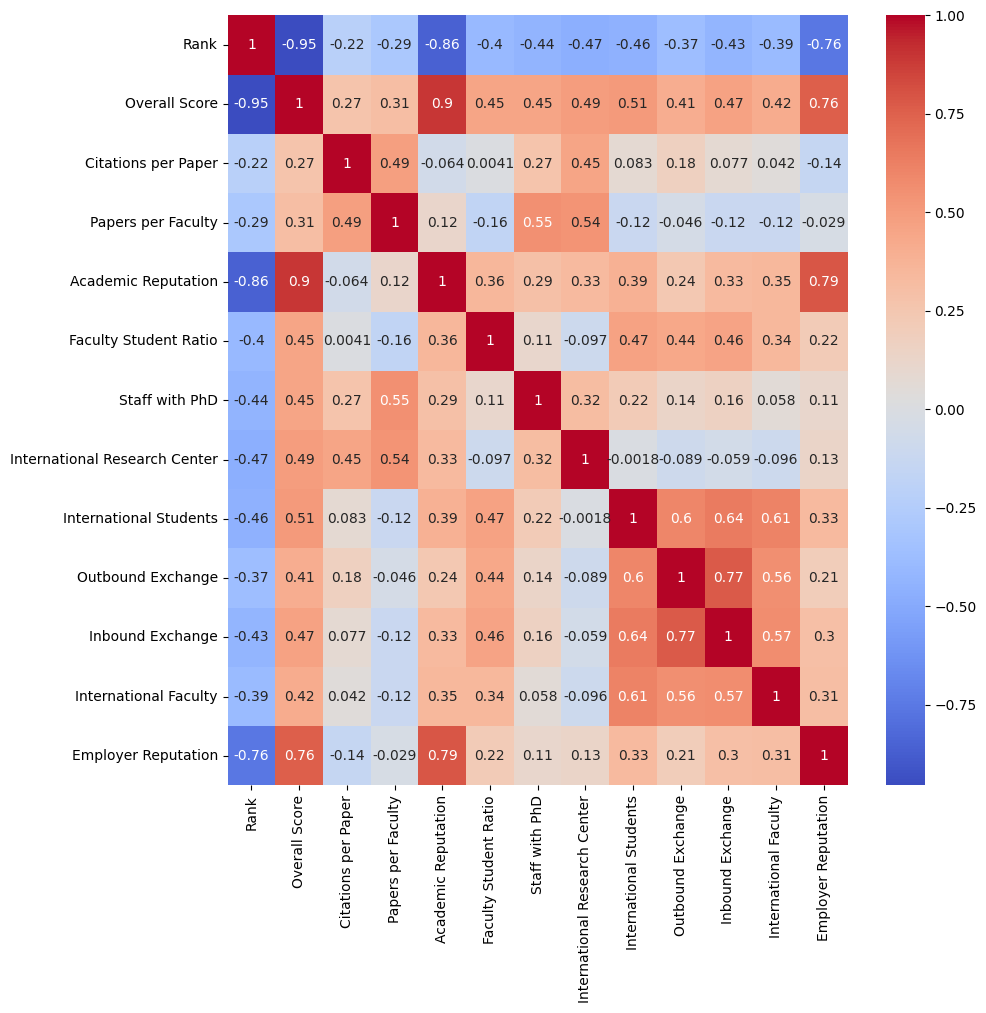

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['Rank', 'Overall Score', 'Citations per Paper', 'Papers per Faculty',
       'Academic Reputation', 'Faculty Student Ratio', 'Staff with PhD',
       'International Research Center', 'International Students',
       'Outbound Exchange', 'Inbound Exchange', 'International Faculty',
       'Employer Reputation']].corr(),annot=True,cmap='coolwarm',cbar=True)

plt.show()

In [40]:
df.columns

Index(['Rank', 'Ordinal Rank', 'University Name', 'Overall Score', 'City',
       'Country', 'Citations per Paper', 'Papers per Faculty',
       'Academic Reputation', 'Faculty Student Ratio', 'Staff with PhD',
       'International Research Center', 'International Students',
       'Outbound Exchange', 'Inbound Exchange', 'International Faculty',
       'Employer Reputation'],
      dtype='object')

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, features):
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]
    return vif_data

features_for_vif = ['Overall Score', 'Citations per Paper', 'Papers per Faculty',
       'Academic Reputation', 'Faculty Student Ratio', 'Staff with PhD',
       'International Research Center', 'International Students',
       'Outbound Exchange', 'Inbound Exchange', 'International Faculty',
       'Employer Reputation']
vif_df = calculate_vif(df, features_for_vif)
x= vif_df[vif_df['VIF'] <= 10]
x

feature      VIF
10  International Faculty  7.43806

In [42]:
# from sklearn.preprocessing import LabelEncoder

# LabelEncoder = LabelEncoder()
# df['Country'] = LabelEncoder.fit_transform(df['Country']).astype(float)/100
# df['City'] = LabelEncoder.fit_transform(df['City']).astype(float)/100
# df

In [61]:
from sklearn.linear_model import Lasso, Ridge,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


def linearmodel():
  x=df['International Faculty']
  y = df['Overall Score']
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
  model0=LinearRegression()
  model0.fit(np.array(x_train).reshape(-1,1),y_train)
  y_pred=model0.predict(np.array(x_test).reshape(-1,1))
  r2_score(y_test,y_pred)
  print("linear",r2_score(y_test,y_pred))


  lasso=Lasso()
  lasso.fit(np.array(x_train).reshape(-1,1),y_train)
  y_pred=lasso.predict(np.array(x_test).reshape(-1,1))
  r2_score(y_test,y_pred)
  print("lasso",r2_score(y_test,y_pred))

  ridge=Ridge()
  ridge.fit(np.array(x_train).reshape(-1,1),y_train)
  y_pred=ridge.predict(np.array(x_test).reshape(-1,1))
  print("ridge",r2_score(y_test,y_pred))

linearmodel()

linear 0.29546465261570476
lasso 0.29464509189565824
ridge 0.29546384111576873


In [60]:

from sklearn.linear_model import Lasso, Ridge,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


def mullinearmodel():
  x=df[['International Faculty','Employer Reputation']]
  y = df['Overall Score']
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
  model0=LinearRegression()
  # model0.fit(np.array(x_train).reshape(-1,1),y_train)
  model0.fit(x_train,y_train)
  # y_pred=model0.predict(np.array(x_test).reshape(-1,1))
  y_pred=model0.predict(x_test)
  r2_score(y_test,y_pred)
  print("linear",r2_score(y_test,y_pred))


  lasso=Lasso()
  # lasso.fit(np.array(x_train).reshape(-1,1),y_train)
  lasso.fit(x_train,y_train)
  # y_pred=lasso.predict(np.array(x_test).reshape(-1,1))
  y_pred1=lasso.predict(x_test)
  r2_score(y_test,y_pred1)
  print("lasso",r2_score(y_test,y_pred))

  ridge=Ridge()
  # ridge.fit(np.array(x_train).reshape(-1,1),y_train)
  ridge.fit(x_train,y_train)
  # y_pred=ridge.predict(np.array(x_test).reshape(-1,1))
  y_pred2=ridge.predict(x_test)
  r2_score(y_test,y_pred2)
  print("ridge",r2_score(y_test,y_pred2))

mullinearmodel()

linear 0.5920548735342264
lasso 0.5920548735342264
ridge 0.5920554093660987


In [62]:

x = df[['Citations per Paper', 'Papers per Faculty',
       'Academic Reputation', 'Faculty Student Ratio', 'Staff with PhD',
       'International Research Center', 'International Students',
       'Outbound Exchange', 'Inbound Exchange', 'International Faculty','Employer Reputation']]
y = df['Overall Score']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
x_test

Citations per Paper  Papers per Faculty  Academic Reputation  \
203                 22.5                25.2                 45.8   
266                 26.5                34.4                 17.7   
152                 71.8                81.4                 34.2   
9                   99.8                91.4                 96.6   
233                 10.5                26.8                 32.1   
226                 70.2                42.0                 19.7   
196                 27.2                42.0                 36.6   
109                 38.7                47.9                 76.8   
5                   99.6                61.5                 99.9   
175                 11.5                29.4                 52.0   
237                 59.8                87.1                 21.9   
57                  78.6                96.9                 71.2   
218                 30.5                50.2                 26.7   
45                   1.5                17.4                 95.2   
182                 44.0                13.1                 40.2   
221                 27.6                99.8                 18.7   
289                  1.3                 3.1                 41.2   
211                 14.7                75.8                 54.9   
148                  1.3                 3.0                 63.6   
165                  6.2                12.8                 43.8   
78                  26.4                14.6                 80.6   
113                  1.5                 8.2                 56.8   
249                 97.7                26.6                 19.4   
250                  5.5                37.8                 36.0   
104                 75.8                99.8                 48.3   
42                  79.2                89.8                 77.4   
281                 18.5                12.0                 34.9   
295                 25.8                15.9                 31.9   
157                 96.9                69.9                 28.4   
238                  1.2                 5.2                 50.3   
17                  69.3                69.0                100.0   
164                 44.5                18.7                 35.4   
33                  24.2                53.6                 95.8   
24                  20.1                51.4                 99.0   
215                 88.1                57.7                 25.8   
119                 22.9                29.2                 61.3   
7                   86.0                96.2                 99.3   
90                  42.5                57.6                 45.6   
46                  31.2                18.5                 98.3   
73                  77.9                28.7                 48.9   
93                  76.0                95.1                 59.9   
76                  95.4                53.3                 65.7   
286                 74.3                51.0                 13.0   
60                  86.9                78.9                 79.8   
77                  26.4                30.8                 59.6   
63                  77.1                70.2                 65.0   
234                 25.9                58.7                 29.8   
229                  6.8                15.0                 44.1   
111                 18.5                37.2                 62.0   
231                  2.9                 7.6                 46.9   
180                 96.6                54.9                 20.7   
144                  9.5                10.8                 53.1   
239                 27.1                66.1                 44.1   
75                  12.9                34.7                 73.0   
297                 64.5                27.4                 16.1   
278                 16.4                 9.7                 44.1   
97                  99.8                49.2                 56.1   
92 

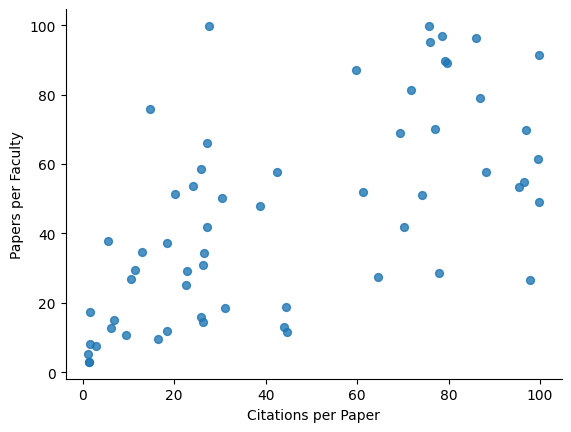

In [46]:


from matplotlib import pyplot as plt
x_test.plot(kind='scatter', x='Citations per Paper', y='Papers per Faculty', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [47]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [48]:
y_pred=model.predict(x_test)
y_pred

array([39.40197829, 31.49643819, 45.39371417, 95.46082964, 35.19958342,
       35.42497798, 40.79639327, 56.11584803, 96.76521262, 42.47425325,
       34.81991724, 69.35033009, 36.1356226 , 75.07693135, 41.65801056,
       36.98149025, 29.75619005, 38.27504453, 47.19879823, 44.09190741,
       62.23771184, 53.27312641, 34.27462234, 33.74366774, 55.88358622,
       76.50208516, 30.49063552, 29.16930074, 44.81112753, 34.65261658,
       91.82575207, 44.04257096, 81.87462995, 86.6060767 , 36.35022336,
       52.25184369, 96.2001661 , 59.27739534, 73.64783967, 62.45861143,
       58.48701793, 62.70461295, 30.60940095, 68.75228518, 62.29850322,
       67.97806722, 35.45089097, 35.71236043, 53.86972645, 35.12573405,
       42.64225766, 47.94165448, 34.61031944, 62.71001944, 28.94896656,
       30.61770792, 56.75746428, 58.3504842 , 40.76352625, 85.54058227])

In [49]:
r2_score(y_test,y_pred)

0.9997213455929823

<Axes: xlabel='Overall Score', ylabel='Density'>

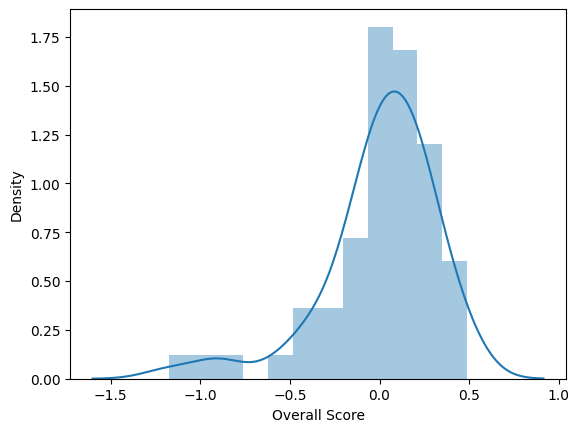

In [50]:
sns.distplot(y_test-y_pred)

In [51]:
mean_squared_error(y_test,y_pred)

0.10166932369342692

In [52]:
from sklearn.svm import SVR
model=SVR(kernel='linear')
model.fit(x_train,y_train)

SVR(kernel='linear')

In [53]:
y_pred1=model.predict(x_test)
y_pred1

array([39.46774663, 31.77148012, 45.44485913, 95.38796204, 35.2477206 ,
       35.52816195, 40.64947204, 56.15965758, 96.76574467, 42.50541353,
       34.8000938 , 69.31528871, 36.26515312, 74.75998047, 41.82013295,
       37.0858127 , 29.92603882, 38.10534343, 47.31640283, 44.03511275,
       62.18613512, 53.23489264, 34.67389297, 33.68784885, 55.90186305,
       76.24725394, 30.58995196, 29.41817026, 45.18305065, 34.71090276,
       91.77192357, 44.33726458, 81.93793023, 86.39705756, 36.67900371,
       52.41115871, 96.03444849, 59.48161317, 73.60378012, 62.86833438,
       58.4934566 , 62.73374752, 31.10476355, 68.68726746, 62.30014203,
       68.02106895, 35.1886923 , 35.56378733, 53.96421103, 35.196531  ,
       43.07390208, 48.13431882, 34.63559133, 62.69873975, 29.16937707,
       30.693972  , 57.11126248, 58.5864841 , 40.90842952, 85.46868832])

In [69]:
# prompt: get me deployment code

import pickle
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.svm import SVR
import numpy as np

# Load the dataset
df = pd.read_csv(r'/content/topuniversities.csv')

# Handle missing values
def relacenulls(col, col2, col3):
    col = col.fillna(np.mean(col))
    col2 = col2.fillna(np.mean(col2))
    col3 = col3.fillna(np.mean(col3))
    return col, col2, col3
col = df['Staff with PhD']
col2 = df['International Students']
col3 = df['International Faculty']
df['Staff with PhD'], df['International Students'], df['International Faculty'] = relacenulls(col, col2, col3)

# Define features and target
X = df[['Citations per Paper', 'Papers per Faculty',
       'Academic Reputation', 'Faculty Student Ratio', 'Staff with PhD',
       'International Research Center', 'International Students',
       'Outbound Exchange', 'Inbound Exchange', 'International Faculty','Employer Reputation']]
y = df['Overall Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train the SVR model
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

# Save the models
filename_linear = 'linear_regression_model.pkl'
filename_svr = 'svr_model.pkl'

pickle.dump(linear_model, open(filename_linear, 'wb'))
pickle.dump(svr_model, open(filename_svr, 'wb'))

# Download the models
files.download(filename_linear)
files.download(filename_svr)

print("Models trained and downloaded.")

# Evaluate Models
y_pred_linear=linear_model.predict(X_test)
r2_linear=r2_score(y_test,y_pred_linear)
print(f"R2 score for Linear Regression model on test set: {r2_linear:.4f}")

y_pred_svr=svr_model.predict(X_test)
r2_svr=r2_score(y_test,y_pred_svr)
print(f"R2 score for SVR model on test set: {r2_svr:.4f}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Models trained and downloaded.
R2 score for Linear Regression model on test set: 0.9997
R2 score for SVR model on test set: 0.9997


Deep Learning


In [63]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

In [64]:
# model = Sequential()
# model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1))


In [68]:

# # Compile the model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# model.fit(x_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

# # Evaluate the model
# loss, accuracy = model.evaluate(x_test, y_test)
# print(f'Test Accuracy: {accuracy}')

# # Make predictions
# predictions = model.predict(x_test)


Epoch 1/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.0000e+00 - loss: -832.6627 - val_accuracy: 0.0000e+00 - val_loss: -821.0661
Epoch 2/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0000e+00 - loss: -817.6033 - val_accuracy: 0.0000e+00 - val_loss: -821.0661
Epoch 3/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: -806.1656 - val_accuracy: 0.0000e+00 - val_loss: -821.0661
Epoch 4/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: -809.2066 - val_accuracy: 0.0000e+00 - val_loss: -821.0661
Epoch 5/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0000e+00 - loss: -800.2829 - val_accuracy: 0.0000e+00 - val_loss: -821.0661
Epoch 6/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: -814.0438 - val_accuracy: 0.0000e+00 - val_loss: -821.0661
Epoch 7/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: -813.5447 - val_accuracy: 0.0000e+00 - val_loss: -821.0661
Epoch 8/150
6/6 ━━━━